# Bioindicators of Strawberry Creek
### Professors George Roderick, John Huelsenbeck & Alan Shabel
_Estimated Time: 50 minutes_

Welcome! In this lab you will be using data science tools to examine differences in the ecological health between two branches of Strawberry Creek on the Berkeley Campus.

<p><a href="https://www.bravoyourcity.com/story/cal-secret-spots-strawberry-creek"><img src=\"images/Bridge.png\"></a></p>

**Learning Outcomes**

By the end of the notebook, students should be able to:

1. Explain the use of biological organisms as indicators of ecosystem health.
2. Interpret biological metrics of diversity: taxon richness, %EPT, biotic index (FBI), % filterers, % predators, Shannon index.
3. Use simulated resampling, or permutaions, to determine if means of two distributions are different.
4. Apply a p-value to describe statistical significance.

## Table of Contents 

1. [Jupyter Notebooks](#1)
    - [Types of Cells](#1.1)
    - [Running Cells](#1.2)
    - [Editting, Saving and Submitting](#1.3)
<br/><br/>
2. [Data Recording](#2)
<br/><br/>
3. [Introduction to Data Analytics](#3)
    - [Null and Alternate Hypothess](#3.1)
    - [Permutation Tests](#3.2)
<br/><br/>

## Jupyter Notebooks <a id='1'></a>

This lab is currently set up in a Jupyter Notebook. A Jupyter Notebook is an online, interactive computing environment, composed of different types of __cells__. Cells are chunks of code or text that are used to break up a larger notebook into smaller, more manageable parts and to let the viewer modify and interact with the elements of the notebook.
 
### Types of cells <a id= '1.1'> </a>

There are two types of cells in Jupyter, __code__ cells and __markdown__ cells. Code cells are cells indicated with “In [  ]:” to the left of the cell. In these cells you can write you own code and run the code in the individual cell.
Markdown cells hold text a majority of the time and do not have the “In [ ]” to the left of the cell.

### Running cells <a id= '1.2'> </a>

'Running' a cell is similar to pressing 'Enter' on a calculator once you've typed in an expression; it computes all of the expressions contained within the cell.

To run a code cell, you can do one of the following:
- press __Shift + Enter__
- click __Cell -> Run Cells__ in the toolbar at the top of the screen.

You can navigate the cells by either clicking on them or by using your up and down arrow keys. Try running the cell below to see what happens. 

In [98]:
print("Hello, World")

Hello, World


The input of the cell consists of the text/code that is contained within the cell's enclosing box. Here, the input is an expression in Python that "prints" or repeats whatever text or number is passed in. 

The output of running a cell is shown in the line immediately after it. Notice that markdown cells have no output. 

### Editing, Saving and Sumbitting <a id='1.3'> </a>

- To __edit__ a cell simply click on the desired cell and begin typing 
- To __save__ your notebook press _command + s_ on the keyboard 
- We will go into the specifics of how to __submit__ your work at the end of the lab, but you will essentially be converting copying values for your Lab Report and, if needed, converting your work into a PDF file and then including that in your Lab Report

## Introduction

<p><a href=\"https://en.wikipedia.org/wiki/File:Strawberry_Creek_near_Dwinelle_Hall.jpg"><img src=\"images/Strawberry_Creek.png\"></a></p>

Throughout this lab you will be using Python to analyze the data that you collected from Strawberry Creek. Python is a general-purpose programming language that allows one to use data analysis methods that simulate data sets that we may not have the resources to collect in real life. 

The main purpose of this lab is to use biological metrics to determine whether or not the ecological health of the two branches of the creek are significantly different from each other.

This next cell imports the Python tools you will need for importing and visualizing your data.

In [99]:
import numpy as np
import pandas as pd
import qgrid
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

## Data Recording <a id='2'> </a>

In this section you will be importing the data you collected in the lab!

To import your data you must:
1. Open up the desired google sheets form.
2. Navigate to the __File__ tab and hover over __Download__.
3. From there another drop down tab should appear with differect formats to chose to download the form. Select the __Comma-Separated Values (csv)__ option.  Check to make sure the name of the file is "SC_data.csv".
4. Upload the file into your datahub folder.

To import the data set just run the following cell!  If all goes smoothly, you will see the first few rows of your data file.

In [100]:
#if you don't want a line of code to run, put a # before the line, like this one
#data = pd.read_csv("data set name")
data = pd.read_csv("SC_data.csv")
data.head()

,Group,Fork,Richness,EPT,Filters,Predators,FBI,Shannon
0,1,North,8,32,36,6,5.52,0.9
1,2,North,7,42,36,6,5.14,0.9
2,3,North,7,40,62,2,5.28,0.4
3,4,North,6,50,65,0,5.48,0.5
4,5,North,6,30,66,0,5.18,1.0


__QGrid__

We will be using a Python widget called QGrid to manupulate the data. QGrid allows you to easily examine the different columns of data in your data set and filter your data. To implement Qgrid on your data set run the following cell!

In [101]:
qgrid.show_grid(data)
#data.describe()

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

To the right of each column title there is a little filter icon that displays a drop down bar when you click on it. From here you can choose which items or numbers you would like to include in you data set. Here, we will continue with all the data.

At this point, it is good to look at your data frame and make sure it is organized in the way you thought it should be.  If it is not the way it should be, go back to your excel file or google sheet, make changes, save to a .csv file, and upload the .csv file again.

## Introduction to Data Analytics <a id= '3'> </a>

### Null Hypothesis vs. Alternate Hypothesis <a id='3.1'> </a>

One of the first problems to work through when looking at a data set is to determine whether or not the trends in the data are significant or purely due to random chance, including measurement error. In this particular lab we are trying to determine whether or not the difference between the ecological health of the two branches of the creek are significantly different from each other or not. To do this we begin by forming a null hypothesis and an alternative hypothesis to test. 

__Null Hypothesis__: A null hypothesis claims that there is no statistical difference between two distributions and that any difference is due to experimental error, measurement error, or chance.

__Alternative Hypothesis__: An alternative hypothesis essentially counters the null hypothesis and claims that the difference between distributions is meaningful, or significant.

__Discussion Questions__

**What would be a potential null hypothesis for this lab?**

_Type your answer here_

**What would be a potential alternative hypothesis?**

_Type your answer here_

First, let's look at the data.  Run the next cell to look at the FBI data you collected for the two forks.

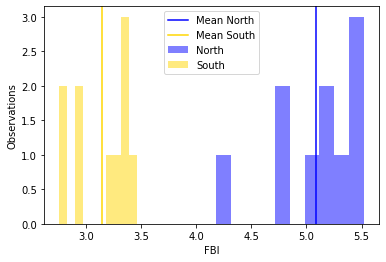

In [102]:
dataNorth = data[:10]
dataSouth = data[10:]

plt.hist(dataNorth['FBI'], color='blue', alpha=0.5, label='North')
plt.hist(dataSouth['FBI'], color='gold', alpha=0.5, label='South')

plt.axvline(dataNorth['FBI'].mean(), color='blue', label='Mean North')
plt.axvline(dataSouth['FBI'].mean(), color='gold', label='Mean South')

plt.xlabel('FBI')
plt.ylabel('Observations')
plt.legend();

First, we need to calculate the observed difference in means of FBI between Forks for the actual data you collected.  The means are denoted by the vertical lines.

Run the cell below to see the observed difference in FBI means between the two samples.

In [103]:
observed_difference = data[data['Fork']=='North'].mean() - data[data['Fork']=='South'].mean()
print("Observed difference between the means for FBI of the original two distributions = ")
observed_difference['FBI']

Observed difference between the means for FBI of the original two distributions = 


1.9439999999999995

The next step is to see if this difference is likely to have arisen by chance alone. Theoretically, if the differences in distributions were solely due to random chance including measurement error, then the data that two distributions originally come from would be the same. This is where permutation tests come in to play.

### Permutation Test <a id='3.2'> </a>

A permutation test essentially shuffles the given data set among categories and creates new distributions. In this case, we are using a permutation test to shuffle the difference in ecological health of the two creeks. As was previously mentioned, a permutation test simulates the null hypothesis because it assumes that there is no significant difference between the distributions. 

A permutation test essentially shuffles the given data set and creates new distributions, with the same size as the original data. In this case, we are using a permutation test to shuffle measurements randomly between categories of North and South Forks. We end up with the same size data set and with the the same number of observations in each category as we had when we started, but the data have been shuffled between categories. We then calculate the mean for each of the two new distributions and compare those means. 

Run the cell below to generate a permutation of the data and to calculate the difference between in means for the FBI index for each of the two new shuffled distributions.  

Difference between the means of the two distributions after one permutation = 


FBI   -0.124
dtype: float64

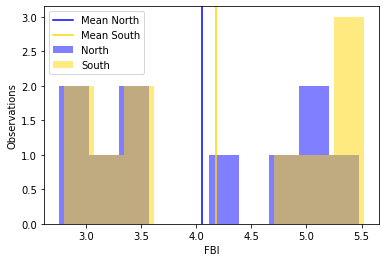

In [104]:
perm_example = pd.DataFrame({
    'FBI':data['FBI'].sample(len(data['FBI'])),
    'Fork':np.append(np.repeat('North', 10), np.repeat('South', 10))
})
#perm_example

dataNorth = perm_example[:10]
dataSouth = perm_example[10:]

plt.hist(dataNorth['FBI'] , color='blue', alpha=0.5, label='North')
plt.hist(dataSouth['FBI'], color='gold', alpha=0.5, label='South')

plt.axvline(dataNorth['FBI'].mean(), color='blue', label='Mean North')
plt.axvline(dataSouth['FBI'].mean(), color='gold', label='Mean South')

plt.xlabel('FBI')
plt.ylabel('Observations')
plt.legend();

perm_difference = perm_example[perm_example['Fork']=='North'].mean() - perm_example[perm_example['Fork']=='South'].mean()
print("Difference between the means of the two distributions after one permutation = ")
perm_difference

You can run the cell above again several times and each time you will see that each permutation will give a slightly different set of distributions and slightly different means. Why?

This is just for one permutation of the data. Now we perform the permutation test many more times, and with these values we can plot the distribution of differences between means for each permutaion. Using this distribution of simulated differences, we can compare it with our actual observed difference to see how likely it is to observe this difference and if our null hypotheis is true.

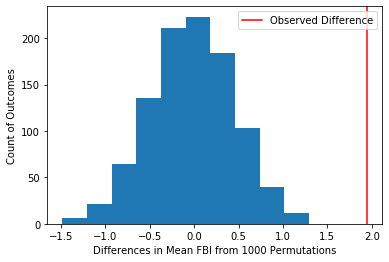

In [105]:
def difference_in_means(fbi_scores):
    return np.mean(fbi_scores[:10]) - np.mean(fbi_scores[10:])

n_repeats = 1000
permutation_differences = []
for i in range(n_repeats):
    permutation = data['FBI'].sample(len(data['FBI']))
    new_difference = difference_in_means(permutation)
    permutation_differences.append(new_difference)
    
#permutation_differences

plt.hist(permutation_differences)
plt.axvline(observed_difference["FBI"], color='red', label='Observed Difference')
plt.xlabel('Differences in Mean FBI from 1000 Permutations')
plt.ylabel('Count of Outcomes')
plt.legend();

Using this plot, we can guess if the null hypothesis is true (the observed difference between the two branches is due to random chance) or if the alternative hypothesis is true (that it is not due to chance alone).

If you run the cell above several times, you will see that the resampling is slightly different each time, but the overall result is the same.

__Discussion Question__

**How likely is it for the observed difference to occur, and can we reject the null hypothesis?**

_Type your answer here_

__P-value & Statistical Significance__

Now that we have a distribution of what the differences in FBI Scores generally look like, we can calculate the p-value to determine how probable it is for the observed_differnce to occur. To calculate the p-value we count the number of times the difference is more extreme or equal to the observed difference in the bootstrapped distribution and divide it by the total amount of bootstrap repetitions. Note that for some hypotheses the observed value may be on the left side of the distribution and for others, the right.

In [106]:
p_val_count = sum(i >= observed_difference["FBI"] for i in permutation_differences)/len(permutation_differences)
print("p-value = ")
p_val_count


p-value = 


0.0

If the p-value is small, it implies that it is very unlikely for this statistic to occur under the null hypothesis and we say we “reject the null hypothesis”. Otherwise, if the p-value is large, it implies that the observed test statistic has a high likelihood of occurring under the null and we say we “fail to reject the null hypothesis”. 

A conventional cut-off for p-values is 0.05 or 5%. If the p-value is less than or equal to 5%, then the p-value is deemed “statistically significant”. Here, the p-value is larger than that. We will discuss p-values more in lab.

__Discussion Question__

__Using the calculated p-value above, do we reject the null hypothesis or fail to reject the null hypothesis? Why?__

_type answer here_

### Your data<a id='4'> </a>

Next, you will calculate the mean differences for each of the metrics you measured.  Run the next cell for the observerd differences between forks for each of the biological measures.

In [107]:
observed_difference = data[data['Fork']=='North'].mean() - data[data['Fork']=='South'].mean()
observed_difference

Group         0.000
Richness     -1.000
EPT         -12.300
Filters      21.300
Predators   -37.700
FBI           1.944
Shannon      -0.495
dtype: float64

Let's start with the FBI index, which you just did.  The next cell runs the permutations, graphs the data, and calculates a p-value, just like for the sample data above. We will do each of the measurements in turn.

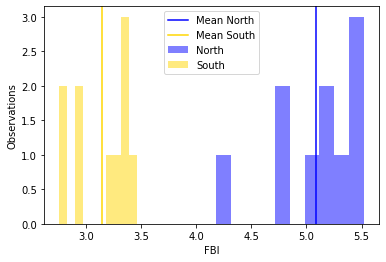

In [108]:
dataNorth = data[:10]
dataSouth = data[10:]

plt.hist(dataNorth['FBI'], color='blue', alpha=0.5, label='North')
plt.hist(dataSouth['FBI'], color='gold', alpha=0.5, label='South')

plt.axvline(dataNorth['FBI'].mean(), color='blue', label='Mean North')
plt.axvline(dataSouth['FBI'].mean(), color='gold', label='Mean South')

plt.xlabel('FBI')
plt.ylabel('Observations')
plt.legend();

0.0

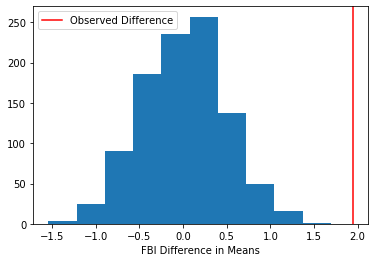

In [118]:
def difference_in_means(SC_scores):
    return np.mean(SC_scores[:10]) - np.mean(SC_scores[10:])

n_repeats = 1000
permutation_differences = []
for i in range(n_repeats):
    permutation = data['FBI'].sample(len(data['FBI']))
    new_difference = difference_in_means(permutation)
    permutation_differences.append(new_difference)
    
plt.hist(permutation_differences)
plt.axvline(observed_difference["FBI"], color='red', label='Observed Difference')
plt.xlabel('FBI Difference in Means')
plt.legend();

p_val_count = sum(i >= observed_difference["FBI"] for i in permutation_differences)/len(permutation_differences)
p_val_count
    
#permutation_differences



Now, it is easy to do repeat the same analysis for each of the other biological measures you collected in the lab.  Note, that for the p-value, if the observed difference is on the _left_ side of the distribution, you are interested in how many permutations were more extreme on the _left_ side.  In the code, we will have to change the <= sign in the line i >= observed_difference["measure"] to i <= observed_difference["measure"].  We have tried to make these edits for you already.

One of the values of using a Notebook, is that it makes repeating the same process easy and repeatable.

Next we will look at Richness.

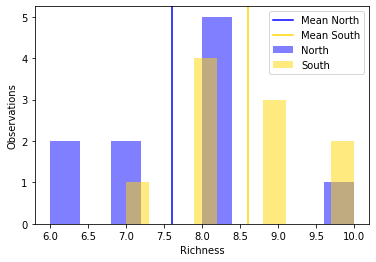

In [110]:
dataNorth = data[:10]
dataSouth = data[10:]

plt.hist(dataNorth['Richness'], color='blue', alpha=0.5, label='North')
plt.hist(dataSouth['Richness'], color='gold', alpha=0.5, label='South')

plt.axvline(dataNorth['Richness'].mean(), color='blue', label='Mean North')
plt.axvline(dataSouth['Richness'].mean(), color='gold', label='Mean South')

plt.xlabel('Richness')
plt.ylabel('Observations')
plt.legend();

0.039

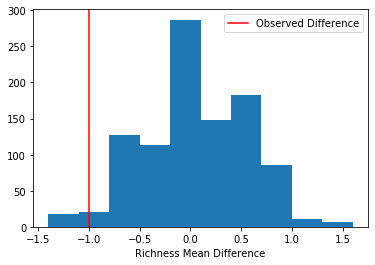

In [111]:
def difference_in_means(SC_scores):
    return np.mean(SC_scores[:10]) - np.mean(SC_scores[10:])

n_repeats = 1000
permutation_differences = []
for i in range(n_repeats):
    permutation = data['Richness'].sample(len(data['Richness']))
    new_difference = difference_in_means(permutation)
    permutation_differences.append(new_difference)
    
plt.hist(permutation_differences)
plt.axvline(observed_difference["Richness"], color='red', label='Observed Difference')
plt.xlabel('Richness Difference in Means')
plt.legend();

p_val_count = sum(i <= observed_difference["Richness"] for i in permutation_differences)/len(permutation_differences)
p_val_count

EPT

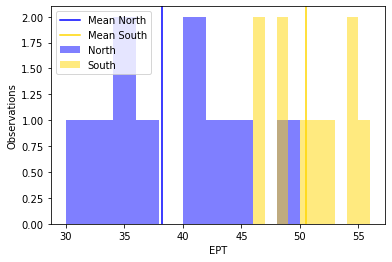

In [112]:
dataNorth = data[:10]
dataSouth = data[10:]

plt.hist(dataNorth['EPT'], color='blue', alpha=0.5, label='North')
plt.hist(dataSouth['EPT'], color='gold', alpha=0.5, label='South')

plt.axvline(dataNorth['EPT'].mean(), color='blue', label='Mean North')
plt.axvline(dataSouth['EPT'].mean(), color='gold', label='Mean South')

plt.xlabel('EPT')
plt.ylabel('Observations')
plt.legend();

0.0

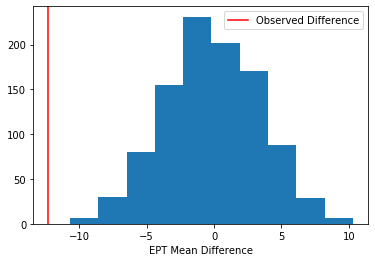

In [113]:
def difference_in_means(SC_scores):
    return np.mean(SC_scores[:10]) - np.mean(SC_scores[10:])

n_repeats = 1000
permutation_differences = []
for i in range(n_repeats):
    permutation = data['EPT'].sample(len(data['EPT']))
    new_difference = difference_in_means(permutation)
    permutation_differences.append(new_difference)
    
plt.hist(permutation_differences)
plt.axvline(observed_difference["EPT"], color='red', label='Observed Difference')
plt.xlabel('EPT Difference in Means')
plt.legend();

p_val_count = sum(i <= observed_difference["EPT"] for i in permutation_differences)/len(permutation_differences)
p_val_count

In [114]:
Filters

NameError: name 'Filters' is not defined

In [ ]:
dataNorth = data[:10]
dataSouth = data[10:]

plt.hist(dataNorth['Filters'], color='blue', alpha=0.5, label='North')
plt.hist(dataSouth['Filters'], color='gold', alpha=0.5, label='South')

plt.axvline(dataNorth['Filters'].mean(), color='blue', label='Mean North')
plt.axvline(dataSouth['Filters'].mean(), color='gold', label='Mean South')

plt.xlabel('Filters')
plt.ylabel('Observations')
plt.legend();

In [ ]:
def difference_in_means(SC_scores):
    return np.mean(SC_scores[:10]) - np.mean(SC_scores[10:])

n_repeats = 1000
permutation_differences = []
for i in range(n_repeats):
    permutation = data['Filters'].sample(len(data['Filters']))
    new_difference = difference_in_means(permutation)
    permutation_differences.append(new_difference)
    
plt.hist(permutation_differences)
plt.axvline(observed_difference["Filters"], color='red', label='Observed Difference')
plt.xlabel('Filters Difference in Means')
plt.legend();

p_val_count = sum(i >= observed_difference["Filters"] for i in permutation_differences)/len(permutation_differences)
p_val_count

Predators

In [ ]:
dataNorth = data[:10]
dataSouth = data[10:]

plt.hist(dataNorth['Predators'], color='blue', alpha=0.5, label='North')
plt.hist(dataSouth['Predators'], color='gold', alpha=0.5, label='South')

plt.axvline(dataNorth['Predators'].mean(), color='blue', label='Mean North')
plt.axvline(dataSouth['Predators'].mean(), color='gold', label='Mean South')

plt.xlabel('Predators')
plt.ylabel('Observations')
plt.legend();

0.0

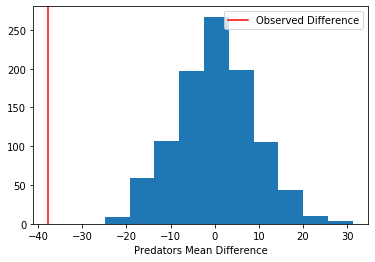

In [115]:
def difference_in_means(SC_scores):
    return np.mean(SC_scores[:10]) - np.mean(SC_scores[10:])

n_repeats = 1000
permutation_differences = []
for i in range(n_repeats):
    permutation = data['Predators'].sample(len(data['Predators']))
    new_difference = difference_in_means(permutation)
    permutation_differences.append(new_difference)
    
plt.hist(permutation_differences)
plt.axvline(observed_difference["Predators"], color='red', label='Observed Difference')
plt.xlabel('Predators Difference in Means')
plt.legend();

p_val_count = sum(i <= observed_difference["Predators"] for i in permutation_differences)/len(permutation_differences)
p_val_count

Shannon

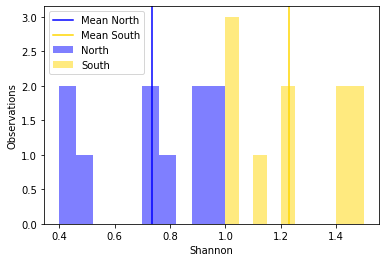

In [116]:
dataNorth = data[:10]
dataSouth = data[10:]

plt.hist(dataNorth['Shannon'], color='blue', alpha=0.5, label='North')
plt.hist(dataSouth['Shannon'], color='gold', alpha=0.5, label='South')

plt.axvline(dataNorth['Shannon'].mean(), color='blue', label='Mean North')
plt.axvline(dataSouth['Shannon'].mean(), color='gold', label='Mean South')

plt.xlabel('Shannon')
plt.ylabel('Observations')
plt.legend();

0.0

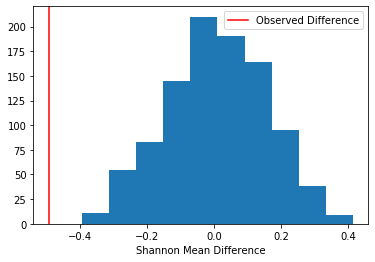

In [117]:
def difference_in_means(SC_scores):
    return np.mean(SC_scores[:10]) - np.mean(SC_scores[10:])

n_repeats = 1000
permutation_differences = []
for i in range(n_repeats):
    permutation = data['Shannon'].sample(len(data['Shannon']))
    new_difference = difference_in_means(permutation)
    permutation_differences.append(new_difference)
    
plt.hist(permutation_differences)
plt.axvline(observed_difference["Shannon"], color='red', label='Observed Difference')
plt.xlabel('Shannon Difference in Means')
plt.legend();

p_val_count = sum(i <= observed_difference["Shannon"] for i in permutation_differences)/len(permutation_differences)
p_val_count

## Submitting the Lab

## Bibliography 

---

Notebook developed by: Joshua Asuncion, Karalyn Chong, Andy Sheu

Data Science Modules: http://data.berkeley.edu/education/modules